### Neural Network Implementation using Keras
- Dataset: Pima Indian Diabetes Dataset
- Library: Keras with Tensorflow (backend)
- Notes: Please install Keras and Tensorflow before run the program

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

C:\Users\FURANZU\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\FURANZU\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.
C:\Users\FURANZU\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# load the dataset
df = pd.read_csv('diabetes.csv')

# rename the column
df = df.rename({'DiabetesPedigreeFunction':'DMF'}, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DMF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [154]:
# Split into features and labes
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

# print the train and test set
print('Train Size {}'.format(X_train.shape))
print('Test Size {}'.format(X_test.shape))

Train Size (537, 8)
Test Size (231, 8)


In [155]:
# fix random seed for reproducibility
np.random.seed(10)

# Build the Networks
def neural_network(n_inputs=8):
    model = Sequential()
    # input layer = 8 nodes, hidden Layer = 12 nodes
    model.add(Dense(12, input_dim=n_inputs, activation='relu'))
    
    # hidden layer = 8 nodes
    model.add(Dense(8, activation='relu'))
    
    # output layer = 1 node --> binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model, you can use other loss function/optimizer
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model

# generate the model
nn_model = neural_network()

# summarized the mode
nn_model.summary()

# fit the model (backpropagation is applied)
# history = nn_model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=10, verbose=False)

history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=False)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_77 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


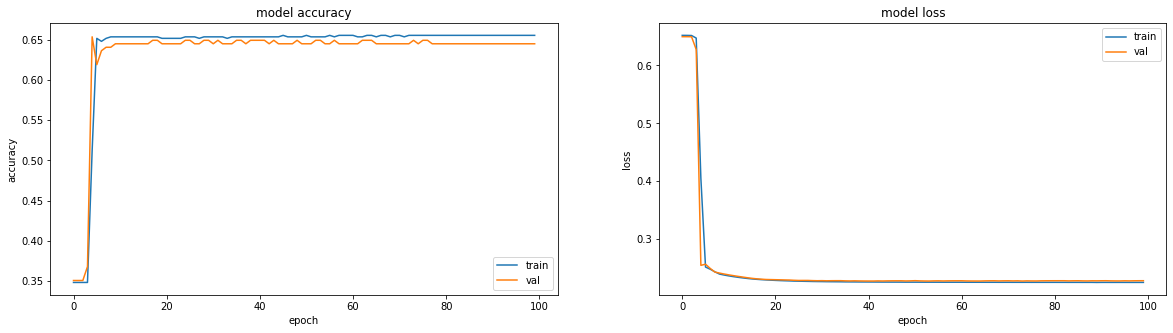

In [159]:
# summarize for accuracy score
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

# summarize for loss score
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [157]:
# Evaluate the model (training accuracy)
train_scores = nn_model.evaluate(X_train, y_train, verbose=False)
print('(Training) %s: %.2f%%' % (nn_model.metrics_names[1], train_scores[1]*100))

# Evaluate the model (testing accuracy)
test_scores = nn_model.evaluate(X_test, y_test, verbose=False)
print('(Testing) %s: %.2f%%' % (nn_model.metrics_names[1], test_scores[1]*100))

(Training) accuracy: 65.55%
(Testing) accuracy: 64.50%


In [129]:
# make probability prediction with the model
prediction = nn_model.predict(X_test)

# round prediction
rounded = [round(x[0]) for x in prediction]

# make class predictions with the model
cls_prediction = nn_model.predict_classes(X_test)

In [124]:
# save the model
nn_model.save('NN_model.h5')
print('The model is saved into the disk')

The model is saved into the disk
